In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download('AAPL', start='2015-01-01', end='2025-06-01')

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500


In [49]:
# Flatten the columns to just the second level (e.g., 'Price', 'Close', etc.)
data.columns = data.columns.get_level_values(0)
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700


In [50]:
data.columns.name = None
data = data.reset_index()
data


,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000
...,...,...,...,...,...,...
2613,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2614,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2615,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700
2616,2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800


In [51]:
import pandas_ta

data['garman_klass_vol'] = (((np.log(data['High']) - np.log(data['Low']))**2)/2) - ((2*np.log(2)-1)*(np.log(data['Close'])-np.log(data['Open']))**2)
data['rsi'] = pandas_ta.rsi(close=data['Close'], length=14)

bands = pandas_ta.bbands(close=np.log1p(data['Close']), length=20)
data['bb_low'] = bands['BBL_20_2.0']
data['bb_mid'] = bands['BBM_20_2.0']
data['bb_high'] = bands['BBU_20_2.0']


atr = pandas_ta.atr(high=data['High'], low=data['Low'], close=data['Close'], length=14)
data['atr'] = (atr - atr.mean()) / atr.std()

macd = pandas_ta.macd(close=data['Close'], length=20).iloc[:, 0]  # MACD line
data['macd'] = (macd - macd.mean()) / macd.std()


data['dollar_volume'] = (data['Close']*data['Volume'])/1e6

data

,Date,Close,High,Low,Open,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume
0,2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400,0.000564,NaN,NaN,NaN,NaN,NaN,NaN,5169.058345
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000,0.000319,0.000000,NaN,NaN,NaN,NaN,NaN,6069.665622
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400,0.000346,0.024931,NaN,NaN,NaN,NaN,NaN,6212.970683
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,0.000087,3.876180,NaN,NaN,NaN,NaN,NaN,3840.151552
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000,0.000265,13.810849,NaN,NaN,NaN,NaN,NaN,5902.565603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900,0.000209,38.828188,5.268682,5.330463,5.392244,2.188436,-0.697938,15315.592718
2614,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,0.000103,44.869601,5.266110,5.328120,5.390129,2.154877,-0.804277,11269.520963
2615,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,0.000099,45.117730,5.264224,5.325576,5.386927,2.021082,-0.873405,9086.982591
2616,2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800,0.000222,44.633524,5.262945,5.322612,5.382279,1.992867,-0.936953,10276.790003


In [52]:
spy = yf.download('SPY', start='2015-01-01', end='2025-06-01')
spy.columns = spy.columns.get_level_values(0)
spy.columns.name = None

spy = spy.reset_index()

spy


[*********************100%***********************]  1 of 1 completed


,Date,Close,High,Low,Open,Volume
0,2015-01-02,171.568054,172.779054,170.524097,172.361472,121465900
1,2015-01-05,168.469543,170.682726,168.160536,170.515696,169632600
2,2015-01-06,166.882736,169.304710,166.080972,168.778552,209151400
3,2015-01-07,168.962296,169.304716,167.768015,168.218999,125346700
4,2015-01-08,171.960541,172.177692,170.365385,170.382079,147217800
...,...,...,...,...,...,...
2613,2025-05-23,577.403015,580.095069,573.903351,574.282236,76029000
2614,2025-05-27,589.407593,589.567094,576.725054,584.342549,72588500
2615,2025-05-28,585.997620,591.022803,585.259811,589.816348,68445500
2616,2025-05-29,588.310791,591.451531,584.342542,591.311929,69973300


In [53]:
data['returns'] = data['Close'].pct_change()
spy['returns'] = spy['Close'].pct_change()
data['market returns'] = spy['returns']

window = 30
beta_values = [np.nan] * (window - 1)

returns = pd.DataFrame({
    'stock': data['returns'],
    'market': spy['returns']
}).dropna()

for i in range(window - 1, len(returns)):
    window_data = returns.iloc[i - window + 1 : i + 1]
    cov = np.cov(window_data['stock'], window_data['market'])[0, 1]
    var = np.var(window_data['market'])
    beta = cov / var if var != 0 else np.nan
    beta_values.append(beta)

beta_series = pd.Series(beta_values, index=returns.index)
data = data.reindex(beta_series.index)

data['beta'] = beta_series
data

,Date,Close,High,Low,Open,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,returns,market returns,beta
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000,0.000319,0.000000,NaN,NaN,NaN,NaN,NaN,6069.665622,-0.028172,-0.018060,NaN
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400,0.000346,0.024931,NaN,NaN,NaN,NaN,NaN,6212.970683,0.000094,-0.009419,NaN
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,0.000087,3.876180,NaN,NaN,NaN,NaN,NaN,3840.151552,0.014022,0.012461,NaN
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000,0.000265,13.810849,NaN,NaN,NaN,NaN,NaN,5902.565603,0.038422,0.017745,NaN
5,2015-01-09,24.883966,25.159442,24.484081,25.030590,214798000,0.000357,14.088057,NaN,NaN,NaN,NaN,NaN,5345.026225,0.001073,-0.008014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900,0.000209,38.828188,5.268682,5.330463,5.392244,2.188436,-0.697938,15315.592718,-0.030244,-0.006826,1.421025
2614,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,0.000103,44.869601,5.266110,5.328120,5.390129,2.154877,-0.804277,11269.520963,0.025298,0.020791,1.359656
2615,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,0.000099,45.117730,5.264224,5.325576,5.386927,2.021082,-0.873405,9086.982591,0.001049,-0.005785,1.315832
2616,2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800,0.000222,44.633524,5.262945,5.322612,5.382279,1.992867,-0.936953,10276.790003,-0.002345,0.003947,1.322565


In [54]:
data = data.fillna(method='bfill')
data

/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_42651/3711161472.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')


,Date,Close,High,Low,Open,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,returns,market returns,beta
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000,0.000319,0.000000,3.181122,3.241352,3.301583,-0.875314,0.229515,6069.665622,-0.028172,-0.018060,0.996786
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400,0.000346,0.024931,3.181122,3.241352,3.301583,-0.875314,0.229515,6212.970683,0.000094,-0.009419,0.996786
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,0.000087,3.876180,3.181122,3.241352,3.301583,-0.875314,0.229515,3840.151552,0.014022,0.012461,0.996786
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000,0.000265,13.810849,3.181122,3.241352,3.301583,-0.875314,0.229515,5902.565603,0.038422,0.017745,0.996786
5,2015-01-09,24.883966,25.159442,24.484081,25.030590,214798000,0.000357,14.088057,3.181122,3.241352,3.301583,-0.875314,0.229515,5345.026225,0.001073,-0.008014,0.996786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900,0.000209,38.828188,5.268682,5.330463,5.392244,2.188436,-0.697938,15315.592718,-0.030244,-0.006826,1.421025
2614,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,0.000103,44.869601,5.266110,5.328120,5.390129,2.154877,-0.804277,11269.520963,0.025298,0.020791,1.359656
2615,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,0.000099,45.117730,5.264224,5.325576,5.386927,2.021082,-0.873405,9086.982591,0.001049,-0.005785,1.315832
2616,2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800,0.000222,44.633524,5.262945,5.322612,5.382279,1.992867,-0.936953,10276.790003,-0.002345,0.003947,1.322565


In [55]:
data['alpha'] = data['returns'] - data['beta'] * data['market returns']
data

,Date,Close,High,Low,Open,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,returns,market returns,beta,alpha
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000,0.000319,0.000000,3.181122,3.241352,3.301583,-0.875314,0.229515,6069.665622,-0.028172,-0.018060,0.996786,-0.010170
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400,0.000346,0.024931,3.181122,3.241352,3.301583,-0.875314,0.229515,6212.970683,0.000094,-0.009419,0.996786,0.009483
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,0.000087,3.876180,3.181122,3.241352,3.301583,-0.875314,0.229515,3840.151552,0.014022,0.012461,0.996786,0.001601
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000,0.000265,13.810849,3.181122,3.241352,3.301583,-0.875314,0.229515,5902.565603,0.038422,0.017745,0.996786,0.020734
5,2015-01-09,24.883966,25.159442,24.484081,25.030590,214798000,0.000357,14.088057,3.181122,3.241352,3.301583,-0.875314,0.229515,5345.026225,0.001073,-0.008014,0.996786,0.009060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900,0.000209,38.828188,5.268682,5.330463,5.392244,2.188436,-0.697938,15315.592718,-0.030244,-0.006826,1.421025,-0.020545
2614,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,0.000103,44.869601,5.266110,5.328120,5.390129,2.154877,-0.804277,11269.520963,0.025298,0.020791,1.359656,-0.002970
2615,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,0.000099,45.117730,5.264224,5.325576,5.386927,2.021082,-0.873405,9086.982591,0.001049,-0.005785,1.315832,0.008662
2616,2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800,0.000222,44.633524,5.262945,5.322612,5.382279,1.992867,-0.936953,10276.790003,-0.002345,0.003947,1.322565,-0.007566


In [56]:
risk_free_rate = 0
rolling_mean = data['returns'].rolling(window).mean() - risk_free_rate
rolling_std = data['returns'].rolling(window).std()
data['rolling_sharpe'] = rolling_mean / rolling_std


def downside_std(returns):
    negative_returns = returns[returns < 0]
    return negative_returns.std()

data['downside_std'] = data['returns'].rolling(window).apply(downside_std, raw=False)
data['rolling_sortino'] = rolling_mean / data['downside_std']

data['rolling_volatility'] = data['returns'].rolling(window).std()

data['momentum_20'] = data['Close'] / data['Close'].shift(20) - 1

data['excess_return'] = data['returns'] - data['market returns']

data['adx'] = pandas_ta.adx(high=data['High'], low=data['Low'], close=data['Close'], length=14)['ADX_14']

data

,Date,Close,High,Low,Open,Volume,garman_klass_vol,rsi,bb_low,bb_mid,...,market returns,beta,alpha,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000,0.000319,0.000000,3.181122,3.241352,...,-0.018060,0.996786,-0.010170,NaN,NaN,NaN,NaN,NaN,-0.010112,NaN
2,2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400,0.000346,0.024931,3.181122,3.241352,...,-0.009419,0.996786,0.009483,NaN,NaN,NaN,NaN,NaN,0.009513,NaN
3,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,0.000087,3.876180,3.181122,3.241352,...,0.012461,0.996786,0.001601,NaN,NaN,NaN,NaN,NaN,0.001561,NaN
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000,0.000265,13.810849,3.181122,3.241352,...,0.017745,0.996786,0.020734,NaN,NaN,NaN,NaN,NaN,0.020677,NaN
5,2015-01-09,24.883966,25.159442,24.484081,25.030590,214798000,0.000357,14.088057,3.181122,3.241352,...,-0.008014,0.996786,0.009060,NaN,NaN,NaN,NaN,NaN,0.009086,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900,0.000209,38.828188,5.268682,5.330463,...,-0.006826,1.421025,-0.020545,0.049925,0.013772,0.081828,0.022573,-0.065720,-0.023419,14.959273
2614,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,0.000103,44.869601,5.266110,5.328120,...,0.020791,1.359656,-0.002970,0.028293,0.013772,0.044806,0.021811,-0.046005,0.004508,15.366639
2615,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,0.000099,45.117730,5.264224,5.325576,...,-0.005785,1.315832,0.008662,-0.003876,0.013772,-0.006033,0.021433,-0.049842,0.006834,15.352194
2616,2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800,0.000222,44.633524,5.262945,5.322612,...,0.003947,1.322565,-0.007566,-0.004605,0.013740,-0.007184,0.021434,-0.057825,-0.006292,15.539595


In [63]:
data = data.drop(columns=['High', 'Low', 'Open', 'Volume','dollar_volume'])
data = data.fillna(method='bfill')
data

/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_42651/2365406504.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')


,Close,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,returns,market returns,...,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx,returns_7d_mean,volatility_7d,target
1,23.604334,0.000319,0.000000,3.181122,3.241352,3.301583,-0.875314,0.229515,-0.028172,-0.018060,...,0.277512,0.011500,0.482492,0.019994,0.116706,-0.010112,3.119364,0.001382,0.022878,24.392992
2,23.606552,0.000346,0.024931,3.181122,3.241352,3.301583,-0.875314,0.229515,0.000094,-0.009419,...,0.277512,0.011500,0.482492,0.019994,0.116706,0.009513,3.119364,0.001382,0.022878,23.730961
3,23.937572,0.000087,3.876180,3.181122,3.241352,3.301583,-0.875314,0.229515,0.014022,0.012461,...,0.277512,0.011500,0.482492,0.019994,0.116706,0.001561,3.119364,0.001382,0.022878,23.546568
4,24.857304,0.000265,13.810849,3.181122,3.241352,3.301583,-0.875314,0.229515,0.038422,0.017745,...,0.277512,0.011500,0.482492,0.019994,0.116706,0.020677,3.119364,0.001382,0.022878,24.153067
5,24.883966,0.000357,14.088057,3.181122,3.241352,3.301583,-0.875314,0.229515,0.001073,-0.008014,...,0.277512,0.011500,0.482492,0.019994,0.116706,0.009086,3.119364,0.001382,0.022878,24.337460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,195.270004,0.000209,38.828188,5.268682,5.330463,5.392244,2.188436,-0.697938,-0.030244,-0.006826,...,0.049925,0.013772,0.081828,0.022573,-0.065720,-0.023419,14.959273,-0.011842,0.010941,NaN
2614,200.210007,0.000103,44.869601,5.266110,5.328120,5.390129,2.154877,-0.804277,0.025298,0.020791,...,0.028293,0.013772,0.044806,0.021811,-0.046005,0.004508,15.366639,-0.007636,0.017863,NaN
2615,200.419998,0.000099,45.117730,5.264224,5.325576,5.386927,2.021082,-0.873405,0.001049,-0.005785,...,-0.003876,0.013772,-0.006033,0.021433,-0.049842,0.006834,15.352194,-0.007358,0.018000,NaN
2616,199.949997,0.000222,44.633524,5.262945,5.322612,5.382279,1.992867,-0.936953,-0.002345,0.003947,...,-0.004605,0.013740,-0.007184,0.021434,-0.057825,-0.006292,15.539595,-0.006016,0.017969,NaN


In [58]:
data = data.drop(columns=['Date'])

In [59]:
data['returns_7d_mean'] = data['returns'].rolling(window=7).mean().bfill()
data['volatility_7d'] = data['returns'].rolling(window=7).std().bfill()
data

,Close,High,Low,Open,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,...,alpha,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx,returns_7d_mean,volatility_7d
1,23.604334,24.137514,23.417722,24.057537,257142000,0.000319,0.000000,3.181122,3.241352,3.301583,...,-0.010170,0.277512,0.011500,0.482492,0.019994,0.116706,-0.010112,3.119364,0.001382,0.022878
2,23.606552,23.866477,23.244433,23.668756,263188400,0.000346,0.024931,3.181122,3.241352,3.301583,...,0.009483,0.277512,0.011500,0.482492,0.019994,0.116706,0.009513,3.119364,0.001382,0.022878
3,23.937572,24.037543,23.704305,23.815385,160423600,0.000087,3.876180,3.181122,3.241352,3.301583,...,0.001601,0.277512,0.011500,0.482492,0.019994,0.116706,0.001561,3.119364,0.001382,0.022878
4,24.857304,24.915065,24.148618,24.266363,237458000,0.000265,13.810849,3.181122,3.241352,3.301583,...,0.020734,0.277512,0.011500,0.482492,0.019994,0.116706,0.020677,3.119364,0.001382,0.022878
5,24.883966,25.159442,24.484081,25.030590,214798000,0.000357,14.088057,3.181122,3.241352,3.301583,...,0.009060,0.277512,0.011500,0.482492,0.019994,0.116706,0.009086,3.119364,0.001382,0.022878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,195.270004,197.699997,193.460007,193.669998,78432900,0.000209,38.828188,5.268682,5.330463,5.392244,...,-0.020545,0.049925,0.013772,0.081828,0.022573,-0.065720,-0.023419,14.959273,-0.011842,0.010941
2614,200.210007,200.740005,197.429993,198.300003,56288500,0.000103,44.869601,5.266110,5.328120,5.390129,...,-0.002970,0.028293,0.013772,0.044806,0.021811,-0.046005,0.004508,15.366639,-0.007636,0.017863
2615,200.419998,202.729996,199.899994,200.589996,45339700,0.000099,45.117730,5.264224,5.325576,5.386927,...,0.008662,-0.003876,0.013772,-0.006033,0.021433,-0.049842,0.006834,15.352194,-0.007358,0.018000
2616,199.949997,203.809998,198.509995,203.580002,51396800,0.000222,44.633524,5.262945,5.322612,5.382279,...,-0.007566,-0.004605,0.013740,-0.007184,0.021434,-0.057825,-0.006292,15.539595,-0.006016,0.017969


In [64]:
lag_days = 7
data['target'] = data['Close'].shift(-lag_days)
y_all = data['target'].dropna()
X_all = data.drop(columns=['Close', 'target'])
X_all = X_all.iloc[:-lag_days]

y_all

1        24.392992
2        23.730961
3        23.546568
4        24.153067
5        24.337460
           ...    
2606    195.270004
2607    200.210007
2608    200.419998
2609    199.949997
2610    200.850006
Name: target, Length: 2610, dtype: float64

In [65]:
print(len(X_all), len(y_all))
print("Lengths match?" , len(X_all) == len(y_all))


2610 2610
Lengths match? True


In [62]:
X_all = X_all.iloc[:-lag_days]
y_all = y_all.iloc[:-lag_days]
X_all

,High,Low,Open,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,...,alpha,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx,returns_7d_mean,volatility_7d
1,24.137514,23.417722,24.057537,257142000,0.000319,0.000000,3.181122,3.241352,3.301583,-0.875314,...,-0.010170,0.277512,0.011500,0.482492,0.019994,0.116706,-0.010112,3.119364,0.001382,0.022878
2,23.866477,23.244433,23.668756,263188400,0.000346,0.024931,3.181122,3.241352,3.301583,-0.875314,...,0.009483,0.277512,0.011500,0.482492,0.019994,0.116706,0.009513,3.119364,0.001382,0.022878
3,24.037543,23.704305,23.815385,160423600,0.000087,3.876180,3.181122,3.241352,3.301583,-0.875314,...,0.001601,0.277512,0.011500,0.482492,0.019994,0.116706,0.001561,3.119364,0.001382,0.022878
4,24.915065,24.148618,24.266363,237458000,0.000265,13.810849,3.181122,3.241352,3.301583,-0.875314,...,0.020734,0.277512,0.011500,0.482492,0.019994,0.116706,0.020677,3.119364,0.001382,0.022878
5,25.159442,24.484081,25.030590,214798000,0.000357,14.088057,3.181122,3.241352,3.301583,-0.875314,...,0.009060,0.277512,0.011500,0.482492,0.019994,0.116706,0.009086,3.119364,0.001382,0.022878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,203.832716,197.950430,202.834025,69018500,0.000259,43.379966,5.197456,5.301609,5.405763,3.271585,...,-0.023213,-0.051962,0.025147,-0.088579,0.042868,0.055791,-0.025724,16.837077,-0.006469,0.019177
2600,200.387212,196.761976,197.950420,51216500,0.000166,43.114369,5.211629,5.306076,5.400523,3.088940,...,0.010147,-0.062321,0.026108,-0.102147,0.042792,0.093960,0.006448,16.939575,-0.007366,0.018728
2601,199.178806,192.996910,198.909155,68536700,0.000413,41.487532,5.247252,5.312514,5.377775,3.018735,...,-0.017431,-0.082011,0.025900,-0.135230,0.042707,0.138209,-0.015590,17.449847,-0.009580,0.018049
2602,199.788014,194.425036,197.461064,50478900,0.000370,42.763668,5.246504,5.312172,5.377840,2.921708,...,-0.003735,-0.069305,0.025991,-0.113925,0.042725,-0.006839,-0.000649,17.815198,-0.009404,0.018220


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = X_all.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X_all)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.3, random_state=42, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 1185.2879341790542
R2: -0.11994434963892076


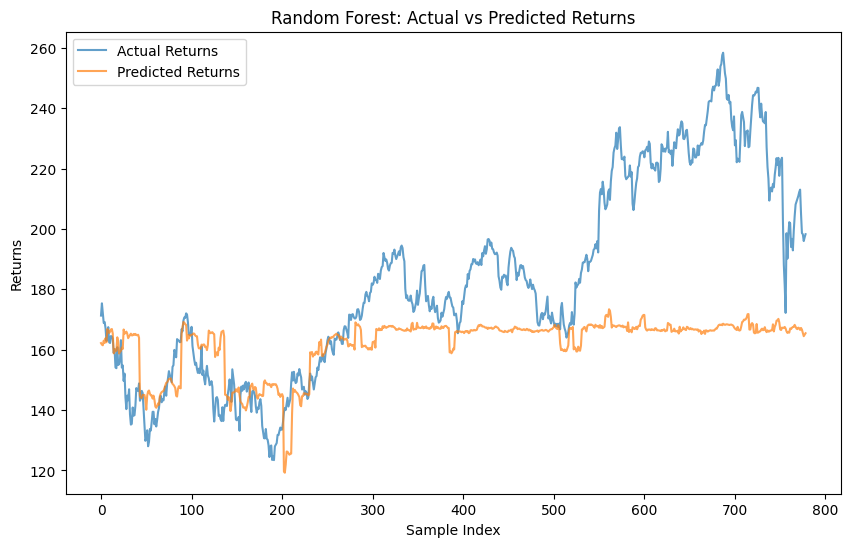

In [30]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Returns', alpha=0.7)
plt.plot(y_pred, label='Predicted Returns', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

with all the different metrics I think that the model is over fitting so I need to find the sweet spot for the model with the current amount of data


In [31]:
feature_names = X_all.columns.to_list()

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

               Feature  Importance
3               bb_mid    0.674241
4              bb_high    0.257865
2               bb_low    0.060408
6                 macd    0.001497
12        downside_std    0.001056
9                 beta    0.000830
5                  atr    0.000637
19       volatility_7d    0.000627
14  rolling_volatility    0.000603
15         momentum_20    0.000547


In [66]:
print(len(X_all), len(y_all))
print("Lengths match?" , len(X_all) == len(y_all))


2610 2610
Lengths match? True


In [67]:
test_1_data = X_all.drop(columns=['garman_klass_vol', 'rsi', 'returns', 'market returns','bb_high','bb_low' ])
print(len(test_1_data), len(y_all))
print("Lengths match?" , len(test_1_data) == len(y_all))

2610 2610
Lengths match? True


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

numeric_features = test_1_data.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(test_1_data)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 1843.5611492723776
R2: -2.041143863855719


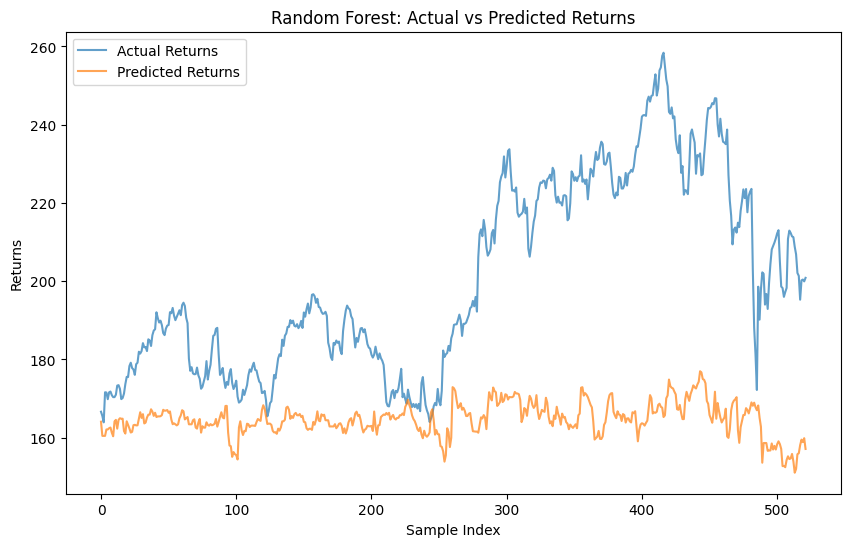

In [69]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Returns', alpha=0.7)
plt.plot(y_pred, label='Predicted Returns', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

shape looks correct however the scale is off but orgininally I removed the close price from X_all and moved it to be the target values but I think it might help the model understand the increase so I am going to add it back

In [43]:
lag_days = 7
data['target'] = data['Close'].shift(-lag_days)
y_all = data['target'].dropna()
X_all = data.drop(columns=['target'])
X_all = X_all.iloc[:-lag_days]

test_2_data = X_all.drop(columns=['garman_klass_vol', 'rsi', 'returns', 'market returns','bb_high','bb_low' ])
test_2_data

,Close,bb_mid,atr,macd,beta,alpha,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx,returns_7d_mean,volatility_7d
1,23.604334,3.241352,-0.875314,0.229515,0.996786,-0.010170,0.277512,0.011500,0.482492,0.019994,0.116706,-0.010112,3.119364,0.001382,0.022878
2,23.606552,3.241352,-0.875314,0.229515,0.996786,0.009483,0.277512,0.011500,0.482492,0.019994,0.116706,0.009513,3.119364,0.001382,0.022878
3,23.937572,3.241352,-0.875314,0.229515,0.996786,0.001601,0.277512,0.011500,0.482492,0.019994,0.116706,0.001561,3.119364,0.001382,0.022878
4,24.857304,3.241352,-0.875314,0.229515,0.996786,0.020734,0.277512,0.011500,0.482492,0.019994,0.116706,0.020677,3.119364,0.001382,0.022878
5,24.883966,3.241352,-0.875314,0.229515,0.996786,0.009060,0.277512,0.011500,0.482492,0.019994,0.116706,0.009086,3.119364,0.001382,0.022878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,212.330002,5.322461,2.669378,-0.273778,1.475131,-0.004703,-0.016039,0.027474,-0.025675,0.043981,0.051788,-0.004096,15.720268,0.009824,0.024576
2607,211.449997,5.326742,2.521770,-0.062318,1.474595,-0.011347,-0.021558,0.027561,-0.034400,0.043980,0.089861,-0.009029,15.009892,0.009505,0.024767
2608,211.259995,5.330290,2.360602,0.094755,1.424759,-0.009923,0.052016,0.022413,0.093867,0.040445,0.073901,-0.007233,14.350256,0.011003,0.023582
2609,208.779999,5.334224,2.374226,0.125384,1.470364,-0.013347,0.108995,0.017896,0.231455,0.038003,0.082283,-0.012833,13.818611,0.008424,0.025117


In [70]:
numeric_features = test_2_data.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(test_2_data)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 1932.7202021857945
R2: -2.188220898312559


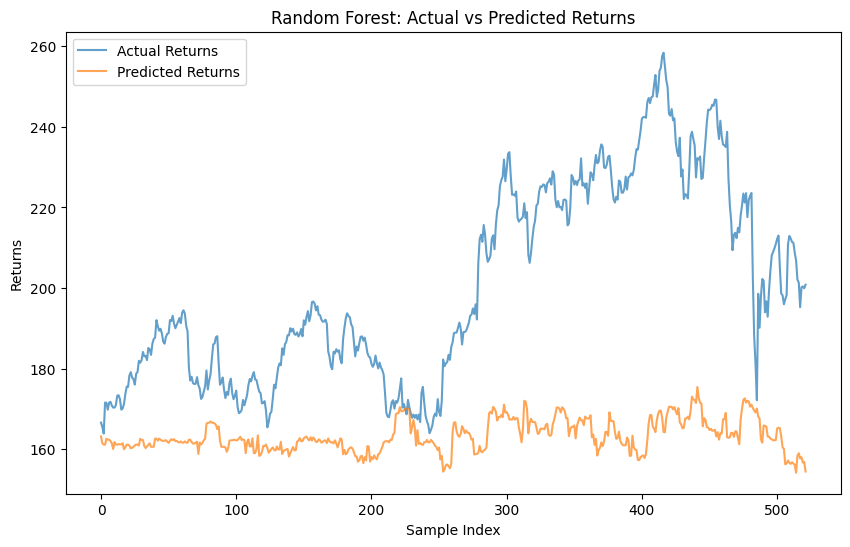

In [71]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Returns', alpha=0.7)
plt.plot(y_pred, label='Predicted Returns', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [80]:
lag_days = 7
data['target'] = data['returns_7d_mean'].shift(-lag_days)
y_all = data['target'].dropna()
X_all = data.drop(columns=['target'])
X_all = X_all.iloc[:-lag_days]
test_2_data = X_all.drop(columns=['garman_klass_vol', 'rsi', 'returns', 'market returns','bb_high','bb_low' ])

test_2_data

,Close,bb_mid,atr,macd,beta,alpha,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx,returns_7d_mean,volatility_7d
1,23.604334,3.241352,-0.875314,0.229515,0.996786,-0.010170,0.277512,0.011500,0.482492,0.019994,0.116706,-0.010112,3.119364,0.001382,0.022878
2,23.606552,3.241352,-0.875314,0.229515,0.996786,0.009483,0.277512,0.011500,0.482492,0.019994,0.116706,0.009513,3.119364,0.001382,0.022878
3,23.937572,3.241352,-0.875314,0.229515,0.996786,0.001601,0.277512,0.011500,0.482492,0.019994,0.116706,0.001561,3.119364,0.001382,0.022878
4,24.857304,3.241352,-0.875314,0.229515,0.996786,0.020734,0.277512,0.011500,0.482492,0.019994,0.116706,0.020677,3.119364,0.001382,0.022878
5,24.883966,3.241352,-0.875314,0.229515,0.996786,0.009060,0.277512,0.011500,0.482492,0.019994,0.116706,0.009086,3.119364,0.001382,0.022878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,212.330002,5.322461,2.669378,-0.273778,1.475131,-0.004703,-0.016039,0.027474,-0.025675,0.043981,0.051788,-0.004096,15.720268,0.009824,0.024576
2607,211.449997,5.326742,2.521770,-0.062318,1.474595,-0.011347,-0.021558,0.027561,-0.034400,0.043980,0.089861,-0.009029,15.009892,0.009505,0.024767
2608,211.259995,5.330290,2.360602,0.094755,1.424759,-0.009923,0.052016,0.022413,0.093867,0.040445,0.073901,-0.007233,14.350256,0.011003,0.023582
2609,208.779999,5.334224,2.374226,0.125384,1.470364,-0.013347,0.108995,0.017896,0.231455,0.038003,0.082283,-0.012833,13.818611,0.008424,0.025117


In [81]:
numeric_features = test_2_data.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(test_2_data)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 7.316514810713544e-05
R2: -0.8071083594217605


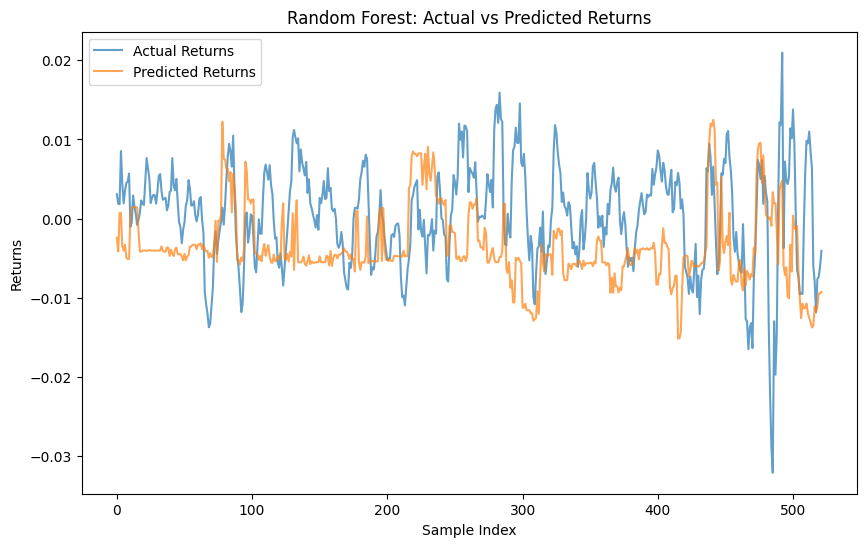

In [82]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Returns', alpha=0.7)
plt.plot(y_pred, label='Predicted Returns', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [83]:
#smooth out the returns because of there volatility
lag_days = 7
data['target'] = data['returns'].ewm(span=5).mean().shift(-lag_days)
y_all = data['target'].dropna()
X_all = data.drop(columns=['target'])
X_all = X_all.iloc[:-lag_days]
test_2_data = X_all.drop(columns=['garman_klass_vol', 'rsi', 'returns', 'market returns','bb_high','bb_low' ])

test_2_data

,Close,bb_mid,atr,macd,beta,alpha,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx,returns_7d_mean,volatility_7d
1,23.604334,3.241352,-0.875314,0.229515,0.996786,-0.010170,0.277512,0.011500,0.482492,0.019994,0.116706,-0.010112,3.119364,0.001382,0.022878
2,23.606552,3.241352,-0.875314,0.229515,0.996786,0.009483,0.277512,0.011500,0.482492,0.019994,0.116706,0.009513,3.119364,0.001382,0.022878
3,23.937572,3.241352,-0.875314,0.229515,0.996786,0.001601,0.277512,0.011500,0.482492,0.019994,0.116706,0.001561,3.119364,0.001382,0.022878
4,24.857304,3.241352,-0.875314,0.229515,0.996786,0.020734,0.277512,0.011500,0.482492,0.019994,0.116706,0.020677,3.119364,0.001382,0.022878
5,24.883966,3.241352,-0.875314,0.229515,0.996786,0.009060,0.277512,0.011500,0.482492,0.019994,0.116706,0.009086,3.119364,0.001382,0.022878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,212.330002,5.322461,2.669378,-0.273778,1.475131,-0.004703,-0.016039,0.027474,-0.025675,0.043981,0.051788,-0.004096,15.720268,0.009824,0.024576
2607,211.449997,5.326742,2.521770,-0.062318,1.474595,-0.011347,-0.021558,0.027561,-0.034400,0.043980,0.089861,-0.009029,15.009892,0.009505,0.024767
2608,211.259995,5.330290,2.360602,0.094755,1.424759,-0.009923,0.052016,0.022413,0.093867,0.040445,0.073901,-0.007233,14.350256,0.011003,0.023582
2609,208.779999,5.334224,2.374226,0.125384,1.470364,-0.013347,0.108995,0.017896,0.231455,0.038003,0.082283,-0.012833,13.818611,0.008424,0.025117


In [84]:
numeric_features = test_2_data.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(test_2_data)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 8.829987855982139e-05
R2: -0.49432189668542925


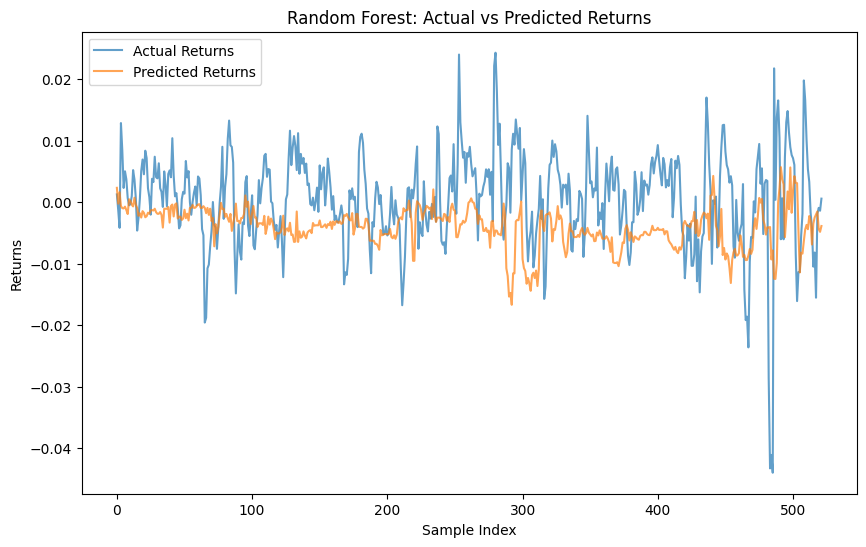

In [77]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Returns', alpha=0.7)
plt.plot(y_pred, label='Predicted Returns', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [91]:
#see what it can do for beating the market
lag_days = 7
data['target'] = data['beta'].shift(-lag_days)
y_all = data['target'].dropna()
X_all = data.drop(columns=['target'])
X_all = X_all.iloc[:-lag_days]
test_2_data = X_all.drop(columns=['garman_klass_vol', 'rsi', 'returns', 'market returns','bb_high','bb_low' ])


In [92]:
numeric_features = test_2_data.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(test_2_data)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 0.10348631019372653
R2: 0.04865180501707822


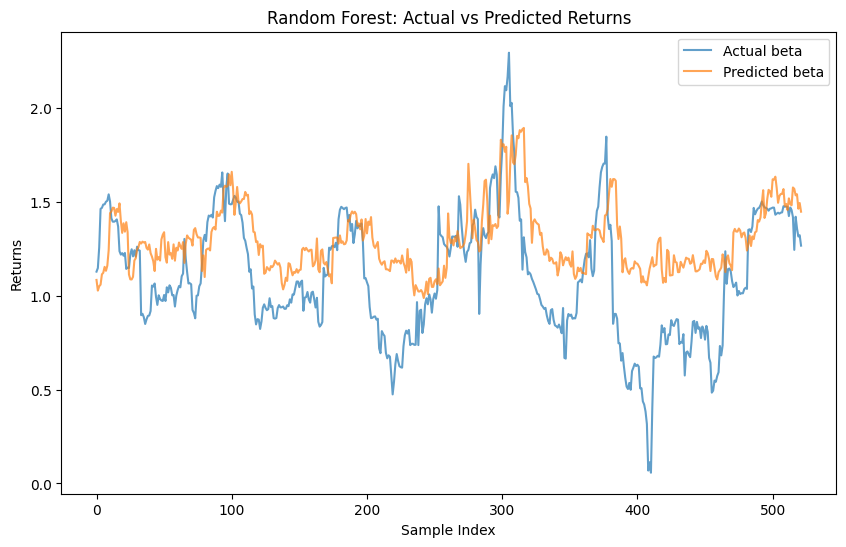

In [94]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual beta', alpha=0.7)
plt.plot(y_pred, label='Predicted beta', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [95]:
lag_days = 7
data['target'] = data['Close'].shift(-lag_days) - data['Close']
y_all = data['target'].dropna()
X_all = data.drop(columns=['target'])
X_all = X_all.iloc[:-lag_days]
test_2_data = X_all.drop(columns=['garman_klass_vol', 'rsi', 'returns', 'market returns','bb_high','bb_low' ])




In [96]:
numeric_features = test_2_data.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(test_2_data)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 146.111050335538
R2: -0.7422634290472367


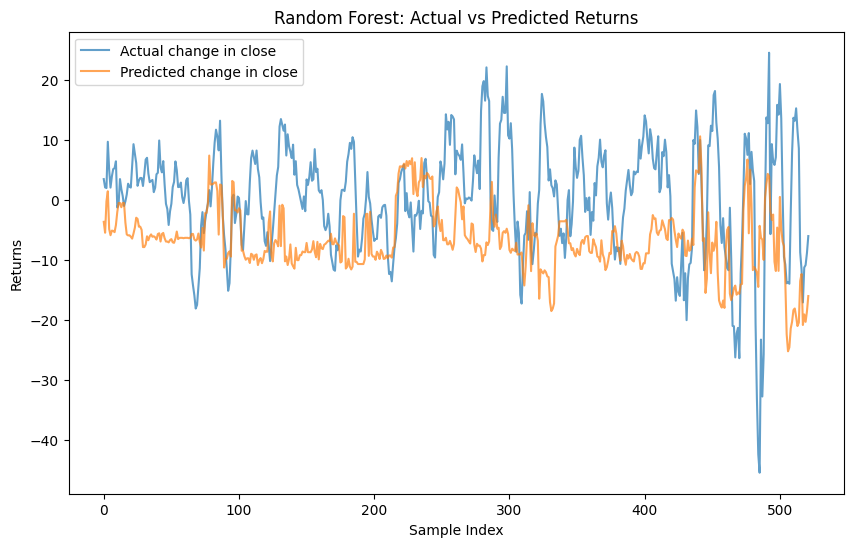

In [97]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual change in close', alpha=0.7)
plt.plot(y_pred, label='Predicted change in close', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [128]:
# change testing to weekley to see if that can smooth data guesses
lag_weeks = 1

weekly_data = data.iloc[::5].reset_index(drop=True)

weekly_data['target'] = weekly_data['Close'].shift(-lag_weeks) - weekly_data['Close']
y_all = weekly_data['target'].dropna()
X_all = weekly_data.drop(columns=['target'])
X_all = X_all.iloc[:-lag_weeks]


print(len(X_all), len(y_all))
print("Lengths match?" , len(X_all) == len(y_all))

523 523
Lengths match? True


In [129]:
numeric_features = X_all.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X_all)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 112.84364004805639
R2: -0.4412856242013532


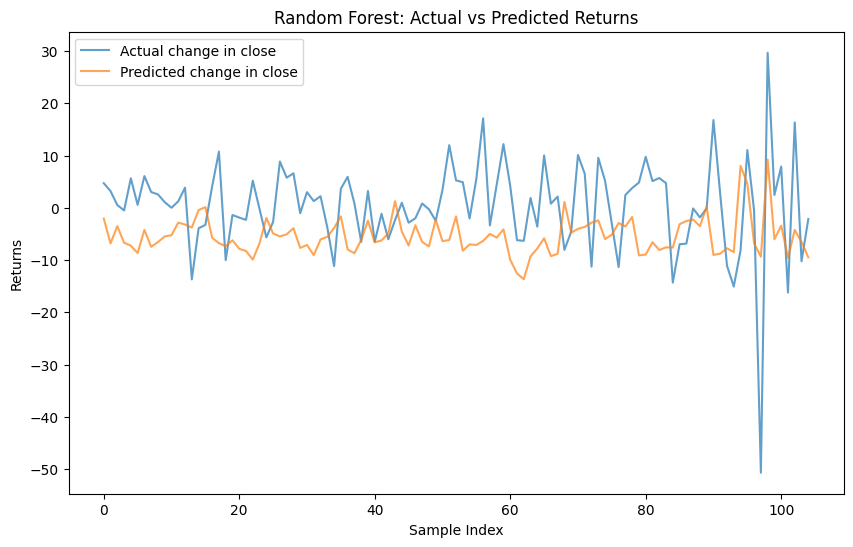

In [130]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual change in close', alpha=0.7)
plt.plot(y_pred, label='Predicted change in close', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

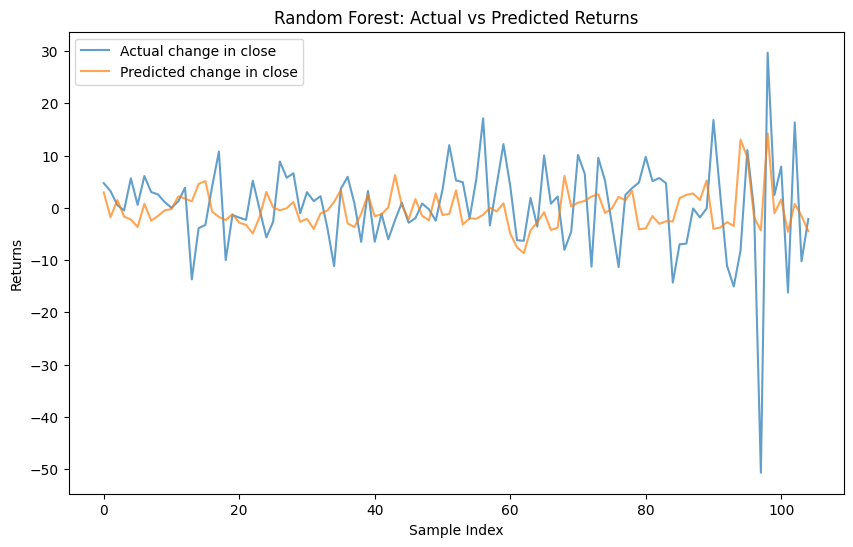

In [131]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual change in close', alpha=0.7)
plt.plot(y_pred+5, label='Predicted change in close', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

looks better when shifted up so I am going to make a least square regression line to find the best b value to shift the predictions

In [132]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)
offset = np.mean(y_test - y_pred)
y_pred_adjusted = y_pred + offset
print("New adjusted MSE:", mean_squared_error(y_test, y_pred_adjusted))
print("New adjusted R2:", r2_score(y_test, y_pred_adjusted))
print("Best offset to add:", offset)

New adjusted MSE: 79.78341315700177
New adjusted R2: -0.019026738094703566
Best offset to add: 5.749802334955056


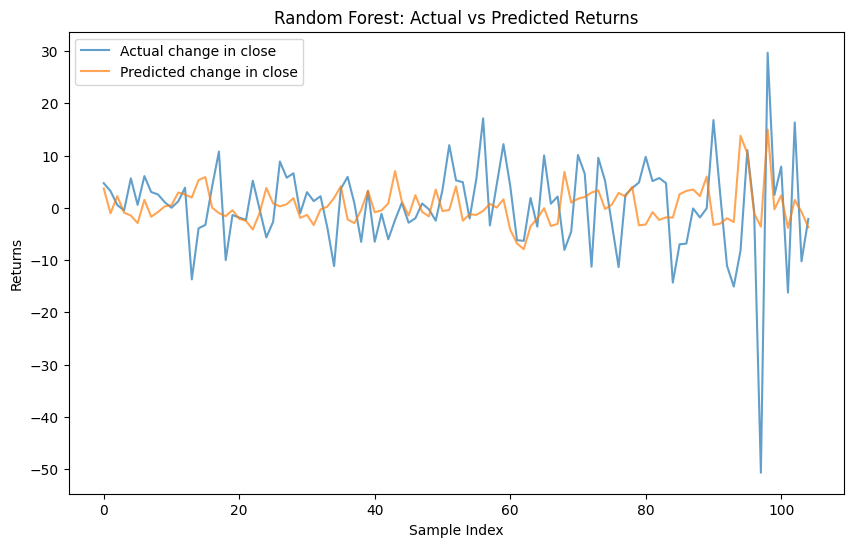

In [133]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual change in close', alpha=0.7)
plt.plot(y_pred_adjusted, label='Predicted change in close', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

as seen above the predictions are much closer

In [145]:
weekly_data['target'] = weekly_data['Close'].shift(-lag_weeks)
y_all = weekly_data['target'].dropna()
X_all = weekly_data.drop(columns=['target'])
X_all = X_all.iloc[:-lag_weeks]


'''print(len(X_all), len(y_all))
print("Lengths match?" , len(X_all) == len(y_all))'''

X_all

,Close,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,returns,market returns,...,alpha,rolling_sharpe,downside_std,rolling_sortino,rolling_volatility,momentum_20,excess_return,adx,returns_7d_mean,volatility_7d
0,23.604334,0.000319,0.000000,3.181122,3.241352,3.301583,-0.875314,0.229515,-0.028172,-0.018060,...,-0.010170,0.277512,0.011500,0.482492,0.019994,0.116706,-0.010112,3.119364,0.001382,0.022878
1,24.270811,0.000246,13.048689,3.181122,3.241352,3.301583,-0.875314,0.229515,-0.024641,-0.007833,...,-0.016832,0.277512,0.011500,0.482492,0.019994,0.116706,-0.016807,3.119364,0.001382,0.022878
2,24.153067,0.000237,20.699058,3.181122,3.241352,3.301583,-0.875314,0.229515,0.025757,0.002133,...,0.023632,0.277512,0.011500,0.482492,0.019994,0.116706,0.023625,3.119364,-0.003950,0.018497
3,24.246370,0.000147,27.198370,3.181122,3.241352,3.301583,-0.887511,0.229515,-0.035013,-0.013190,...,-0.021865,0.277512,0.011500,0.482492,0.019994,0.116706,-0.021823,4.221029,0.003264,0.020968
4,26.359093,0.000078,46.526591,3.181332,3.250585,3.319838,-0.856878,0.229515,0.000169,0.014461,...,-0.014246,0.277512,0.011500,0.482492,0.019994,0.116706,-0.014293,8.175677,0.007400,0.029946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,204.332062,0.000303,49.043631,5.170217,5.313944,5.457670,4.172224,-2.929926,0.024332,0.015495,...,0.001583,-0.039406,0.026312,-0.063951,0.042701,-0.085587,0.008836,26.090260,0.004885,0.026337
519,212.221710,0.000452,54.201204,5.186088,5.300790,5.415491,3.314075,-0.817286,0.006108,0.000397,...,0.005524,0.019213,0.028179,0.028753,0.042170,-0.047896,0.005711,18.557721,0.013786,0.011978
520,195.992981,0.000413,41.487532,5.247252,5.312514,5.377775,3.018735,-1.244824,-0.011385,0.004205,...,-0.017431,-0.082011,0.025900,-0.135230,0.042707,0.138209,-0.015590,17.449847,-0.009580,0.018049
521,212.330002,0.000125,56.117718,5.254344,5.322461,5.390578,2.669378,-0.273778,-0.002818,0.001278,...,-0.004703,-0.016039,0.027474,-0.025675,0.043981,0.051788,-0.004096,15.720268,0.009824,0.024576


In [146]:
numeric_features = X_all.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X_all)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_all, test_size=0.2, random_state=42, shuffle=False)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 1683.1834444450906
R2: -1.729107011208629


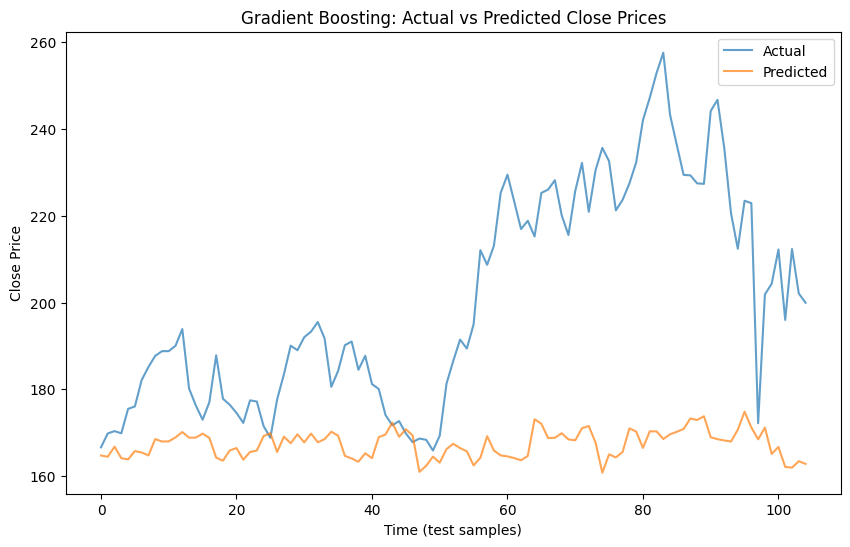

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual', alpha=0.7)
plt.plot(pd.Series(y_pred), label='Predicted', alpha=0.7)
plt.title('Gradient Boosting: Actual vs Predicted Close Prices')
plt.xlabel('Time (test samples)')
plt.ylabel('Close Price')
plt.legend()
plt.show()

predicting overall price doesnt work well in the training because it has past data with much lower price but predicting change in price works reasonably well.

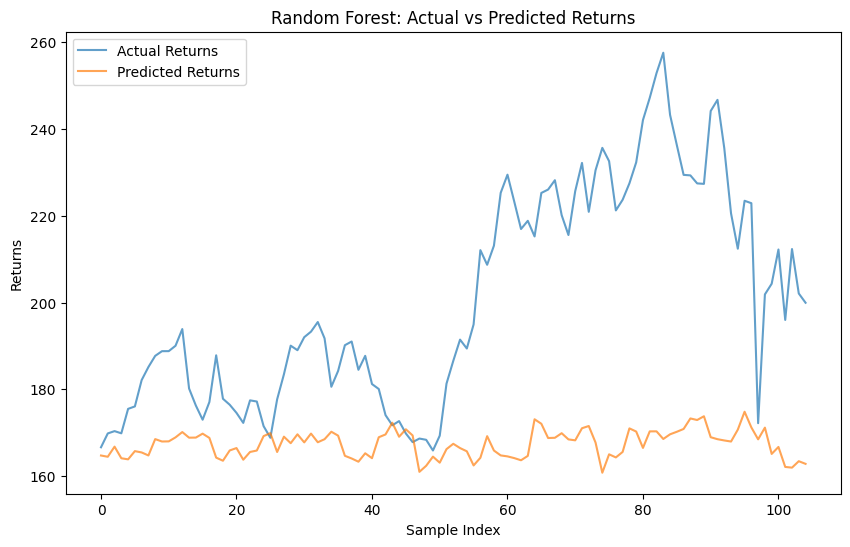

In [148]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Returns', alpha=0.7)
plt.plot(y_pred, label='Predicted Returns', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [149]:
current_close = weekly_data['Close'].values[-len(y_test):]
predicted_close = current_close + y_pred_adjusted


In [154]:
predicted_close

array([170.33579794, 168.76816363, 172.60355135, 168.93125596,
       173.99299301, 173.13972724, 183.64837457, 183.42873991,
       186.90162028, 189.06333949, 189.29496627, 192.96622053,
       196.4236809 , 182.14995176, 181.57986233, 178.87193231,
       177.09769028, 186.82518961, 176.22961296, 175.98030838,
       172.46603838, 169.74982055, 173.28763972, 176.17391272,
       175.31692871, 169.66312428, 177.96290034, 184.13044688,
       191.90265452, 187.08632038, 190.65408187, 189.98034918,
       195.19971673, 191.9607998 , 182.46594057, 188.35160015,
       187.92945906, 188.0850833 , 184.1038188 , 190.98687152,
       180.35652203, 179.58077595, 174.88876345, 178.73315624,
       173.89379367, 168.35046983, 170.24209775, 167.86957873,
       166.72792874, 169.39627664, 168.67544474, 180.88878954,
       190.66121738, 188.98899357, 188.15224965, 193.6017232 ,
       211.48686849, 209.45866625, 213.15378508, 226.90418518,
       225.27149309, 216.44484262, 209.02866158, 215.29

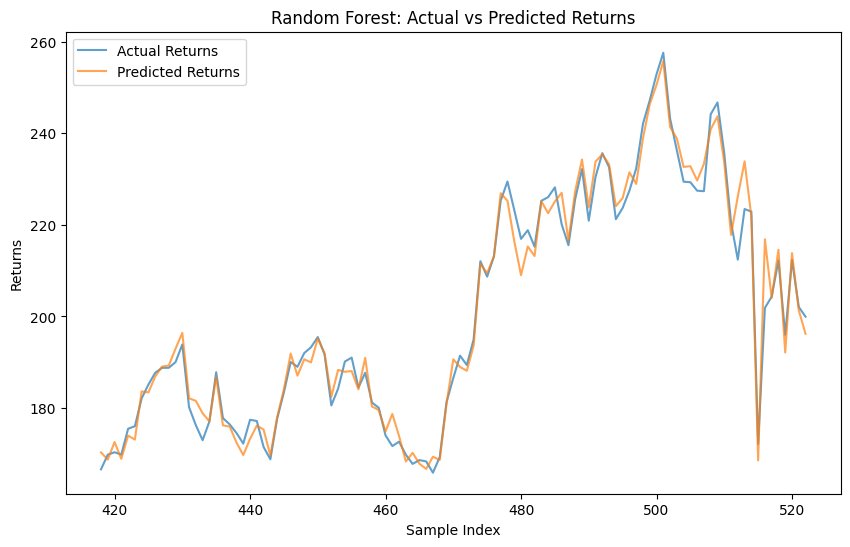

In [155]:
predicted_series = pd.Series(predicted_close, index=y_test.index)
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Returns', alpha=0.7)
plt.plot(predicted_series, label='Predicted Returns', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Returns')
plt.xlabel('Sample Index')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [156]:
mse = mean_squared_error(y_test, predicted_series)
r2 = r2_score(y_test, predicted_series)

print("MSE:", mse)
print("R2:", r2)

MSE: 12.559040613093043
R2: 0.979636820986826


This now gives us a 98% accuracy rating for predicting stocks price in one week and a average variance of + or - 3.5 dollars. Now what is left to do is create a python file that takes in the ticker and from that predicts the next week price and displays the MSE and R2